In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from numpy import nan
import scipy.stats
import math
import scipy as sp
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
data_diabetes=pd.read_csv('diabetes-data.txt',header=None)
data_hepatitis=pd.read_csv('hepatitis-data.txt',header=None)
data_liver=pd.read_csv('liver_disorder_data.txt',header=None)
data_lung=pd.read_csv('lung_cancer_data.txt',header=None)


FileNotFoundError: ignored

In [ ]:
data_lung.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,1,1,1,3,2,2,1,2,2,0,2,2,2,2,1,2,2,2,3,2,1,1,1,3,3,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,1,1,1,1,3,3,1,2,2,0,0,2,2,2,1,2,1,3,2,3,1,1,1,3,3,2,2,2,1,2,2,?,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,1,1,0,3,3,3,1,2,1,0,0,2,2,2,1,2,2,3,2,3,1,3,3,3,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,2,1,0,3,3,1,1,2,2,0,0,2,2,2,2,1,3,2,3,3,1,3,3,3,1,1,1,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,2,2,1,1,2,2,2,2,2,0,0,2,2,2,1,1,2,3,2,2,1,1,1,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2


In [ ]:
data_diabetes

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

In [ ]:
data_diabetes.shape

(768, 9)

In [ ]:
dataset_di=imputer.fit_transform(data_diabetes)
dataset_liv=imputer.fit_transform(data_liver)
dataset_lung=imputer.fit_transform(data_lung)
dataset_hepati=imputer.fit_transform(data_hepatitis)


In [ ]:
df_di = pd.DataFrame.from_records(dataset_di)
df_liv = pd.DataFrame.from_records(dataset_liv)
df_lung = pd.DataFrame.from_records(dataset_lung)
df_hepati = pd.DataFrame.from_records(dataset_hepati)


In [ ]:
df_di=df_di.astype(float)
df_liv=df_liv.astype(float)
df_lung=df_lung.astype(float)
df_hepati=df_hepati.astype(float)

In [ ]:
df_hepati

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.0,30.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,100.0,1.0
1,2.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,100.0,1.0
2,2.0,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,100.0,1.0
3,2.0,31.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1.0
4,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,46.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2.0
151,2.0,44.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,100.0,2.0
152,2.0,61.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,100.0,2.0
153,2.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2.0


## Normaliztion


In [ ]:
from sklearn import preprocessing

x_di = df_di.values #returns a numpy array
x_liv=df_liv.values
x_lung=df_lung.values
x_hepati=df_hepati.values

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()


In [ ]:
x_scaled_di = min_max_scaler.fit_transform(x_di)
x_scaled_liv = min_max_scaler.fit_transform(x_liv)
x_scaled_lung = min_max_scaler.fit_transform(x_lung)
x_scaled_hepati = min_max_scaler.fit_transform(x_hepati)



In [ ]:
x_scaled_di

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [ ]:
values_di=x_scaled_di
values_liv=x_scaled_liv
values_lung=x_scaled_lung
values_hepati=x_scaled_hepati


In [ ]:

X_di, y_di = values_di[:, :-1], values_di[:, -1]
X_liv, y_liv = values_liv[:, :-1], values_liv[:, -1]
X_lung, y_lung = values_lung[:, :-1], values_lung[:, -1]
X_hepati, y_hepati = values_hepati[:, :-1], values_hepati[:, -1]


In [ ]:
X_di

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
trans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [ ]:
X_di = trans.fit_transform(X_di)
X_liv = trans.fit_transform(X_liv)
X_lung = trans.fit_transform(X_lung)
X_hepati = trans.fit_transform(X_hepati)
df_di_X = pd.DataFrame.from_records(X_di)
df_liv_X=pd.DataFrame.from_records(X_liv)
df_lung_X=pd.DataFrame.from_records(X_lung)
df_hepati_X=pd.DataFrame.from_records(X_hepati)

# Task 2

## Feature Selection

In [ ]:
reg_di = LassoCV()
reg_liv = LassoCV()
reg_lung = LassoCV()
reg_hepati = LassoCV()


NameError: ignored

In [ ]:
reg_di.fit(df_di_X, y_di)
reg_liv.fit(df_liv_X, y_liv)
reg_lung.fit(df_lung_X, y_lung)
reg_hepati.fit(df_hepati_X, y_hepati)


NameError: ignored

In [ ]:
print("Best alpha Diabetes using built-in LassoCV: %f" % reg_di.alpha_)
print("Best score using built-in LassoCV: %f" %reg_di.score(df_di_X,y_di))
coef_di = pd.Series(reg_di.coef_, index = df_di_X.columns)
coef_liv = pd.Series(reg_liv.coef_, index = df_liv_X.columns)
coef_lung = pd.Series(reg_lung.coef_, index = df_lung_X.columns)
coef_hepati = pd.Series(reg_hepati.coef_, index = df_hepati_X.columns)


In [ ]:
print("Lasso picked " + str(sum(coef_di != 0)) + " variables and eliminated the other " +  str(sum(coef_di == 0)) + " variables")
print("Lasso picked " + str(sum(coef_liv != 0)) + " variables and eliminated the other " +  str(sum(coef_liv == 0)) + " variables")
print("Lasso picked " + str(sum(coef_lung != 0)) + " variables and eliminated the other " +  str(sum(coef_lung == 0)) + " variables")
print("Lasso picked " + str(sum(coef_hepati != 0)) + " variables and eliminated the other " +  str(sum(coef_hepati == 0)) + " variables")

In [ ]:
'''
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
'''

In [ ]:
count=0
for i in coef_di:
  if( i==0):
    df_di_X=df_di_X.drop(columns=[count])
    
  count+=1


In [ ]:
count=0
for i in coef_liv:
  if( i==0):
    df_liv_X=df_liv_X.drop(columns=[count])
  count+=1


In [ ]:
count=0
for i in coef_lung:
  if( i==0):
    df_lung_X=df_lung_X.drop(columns=[count])
  count+=1

In [ ]:

count=0
for i in coef_hepati:
  if( i==0):
    df_hepati_X=df_hepati_X.drop(columns=[count])
  
  count+=1


# Task 3

## KNN

# Diabetes Dataset

In [ ]:
class KNN():

    X_train=0
    Y_train=0
    test_size=45
    k=0
    def __init__(self, k, scalefeatures=False):        
        self.k=k
        #pass   
    def fit(self, X, Y):
        self.X_train=X
        self.Y_train=Y 

    def Compute_distances(self,X, y, x_train, k):
        n_samples = X.shape[0]
        distances = np.empty(n_samples, dtype=np.float64)

        # distance calculation
        for i in range(n_samples):
            distances[i] = (x_train - X[i]).dot(x_train - X[i])
        #print(distances)
        distances = sp.c_[distances, y]
        sorted_distances = distances[distances[:,0].argsort()]
        targets = sorted_distances[0:k,1]
        unique, counts = np.unique(targets, return_counts=True)
        return(unique[np.argmax(counts)])
    def predict(self,X):

        n_predictions, n_features = X.shape
        predictions = []
        for i in range(n_predictions):
            print(X[i,:])
#            print(self.Compute_distances(self.X_train, self.Y_train, X[i, :], self.k))
            predictions.append( self.Compute_distances(self.X_train, self.Y_train, X[i, :], self.k))
        return(predictions)
    def accuracy_metric(self,actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_di_X.values, y_di, test_size=0.3, random_state=42)

In [ ]:
X_train

array([[0., 1., 1., 1., 0., 0.],
       [1., 2., 2., 2., 0., 0.],
       [0., 2., 2., 2., 0., 0.],
       ...,
       [2., 2., 2., 2., 1., 1.],
       [0., 2., 0., 2., 0., 0.],
       [0., 2., 3., 1., 0., 0.]])

In [ ]:
c1 = KNN(k=7)
c1.fit(X_train, y_train)
pred_y = c1.predict(X_test)

[1. 1. 1. 2. 0. 1.]
[0. 2. 2. 2. 0. 0.]
[0. 2. 2. 1. 0. 0.]
[1. 2. 2. 1. 1. 0.]
[1. 2. 2. 1. 0. 1.]
[1. 2. 2. 2. 0. 2.]
[0. 1. 1. 1. 0. 0.]
[0. 2. 0. 2. 1. 1.]
[0. 3. 2. 1. 0. 1.]
[1. 2. 2. 2. 0. 2.]
[2. 2. 2. 1. 0. 1.]
[1. 3. 3. 2. 0. 2.]
[0. 2. 1. 1. 0. 0.]
[1. 1. 2. 2. 1. 1.]
[0. 1. 1. 1. 1. 0.]
[0. 2. 1. 1. 1. 0.]
[0. 1. 2. 2. 0. 0.]
[1. 1. 2. 1. 0. 0.]
[0. 3. 0. 1. 0. 1.]
[0. 2. 2. 2. 0. 0.]
[1. 2. 2. 1. 0. 1.]
[0. 1. 2. 1. 0. 0.]
[3. 2. 2. 2. 0. 1.]
[0. 1. 2. 1. 0. 0.]
[2. 2. 2. 2. 0. 1.]
[1. 3. 2. 2. 0. 1.]
[1. 2. 1. 1. 0. 0.]
[0. 2. 2. 1. 0. 0.]
[0. 2. 2. 2. 0. 0.]
[0. 1. 2. 1. 0. 1.]
[0. 3. 2. 3. 1. 0.]
[0. 2. 2. 2. 0. 3.]
[0. 3. 2. 2. 0. 0.]
[0. 3. 0. 1. 1. 0.]
[0. 2. 3. 2. 1. 2.]
[2. 3. 2. 2. 1. 0.]
[0. 3. 2. 2. 0. 2.]
[0. 2. 2. 1. 1. 1.]
[2. 2. 2. 1. 0. 2.]
[0. 2. 0. 2. 0. 0.]
[0. 1. 1. 1. 0. 0.]
[0. 2. 1. 1. 1. 2.]
[1. 2. 2. 2. 0. 2.]
[3. 2. 2. 1. 0. 1.]
[1. 1. 3. 1. 0. 0.]
[0. 3. 2. 1. 1. 0.]
[0. 2. 2. 2. 2. 2.]
[1. 1. 2. 2. 0. 0.]
[1. 2. 2. 1. 1. 2.]
[0. 3. 2. 2. 1. 2.]


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(pred_y,y_test))
print("Accuracy ", c1.accuracy_metric(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       152
         1.0       0.59      0.59      0.59        79

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

Accuracy  71.86147186147186


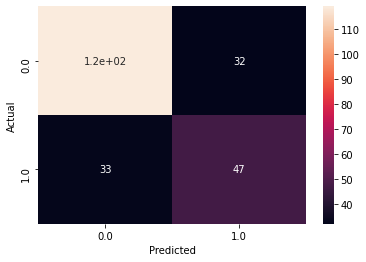

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': pred_y
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       152
         1.0       0.59      0.59      0.59        79

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [ ]:
accuracy_score(y_test, y_pred)

0.7229437229437229

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)

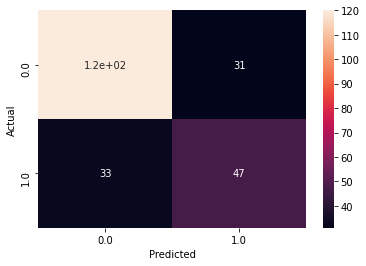

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Kfold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

### For KNN 

In [ ]:
cv = KFold(n_splits=2)
scores = cross_val_score(neigh, df_di_X.values, y_di, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.703125   0.72395833]


### For Naive Bayes

In [ ]:
scores = cross_val_score(gnb, df_di_X.values, y_di, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.70052083 0.72916667]


# Liver Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_liv_X.values, y_liv, test_size=0.3, random_state=42)

In [ ]:
c1 = KNN(k=7)
c1.fit(X_train, y_train)
pred_y = c1.predict(X_test)

[3. 1. 0. 0. 0. 0.]
[2. 2. 1. 1. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 2. 0. 1. 0. 0.]
[3. 2. 0. 1. 0. 1.]
[2. 0. 0. 0. 0. 2.]
[2. 2. 0. 0. 0. 1.]
[2. 2. 0. 0. 0. 0.]
[2. 2. 0. 2. 2. 0.]
[2. 2. 0. 1. 0. 0.]
[3. 2. 1. 1. 1. 1.]
[2. 2. 0. 0. 0. 0.]
[2. 2. 0. 1. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 1.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 2. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 3. 1. 0. 0. 2.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 1.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 1. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 0. 0. 0. 0. 1.]
[2. 1. 1. 2. 0. 1.]
[2. 2. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 2.]
[2. 1. 0. 0. 0. 1.]
[2. 2. 0. 1. 0. 1.]
[2. 0. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 3. 0. 1. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 2. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[3. 2. 0. 0. 0. 0.]
[3. 1. 0. 0. 0. 0.]
[2. 3. 0. 1. 0. 0.]
[2. 0. 0. 0. 0. 0.]
[2. 2. 0. 1. 0. 2.]
[3. 1. 1. 1. 1. 3.]
[2. 2. 1. 1. 0. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 1. 0. 0. 1. 0.]
[2. 1. 0. 1. 0. 0.]
[2. 1. 0. 1. 3. 0.]
[2. 1. 0. 0. 0. 0.]
[2. 2. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(pred_y,y_test))
print("Accuracy ", c1.accuracy_metric(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       0.18      0.42      0.25        19
         1.0       0.82      0.58      0.68        85

    accuracy                           0.55       104
   macro avg       0.50      0.50      0.46       104
weighted avg       0.70      0.55      0.60       104

Accuracy  54.807692307692314


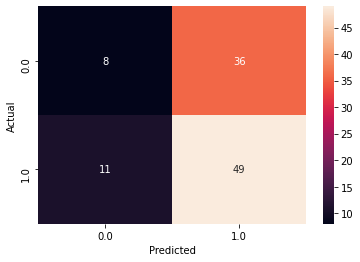

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': pred_y
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       0.18      0.42      0.25        19
         1.0       0.82      0.58      0.68        85

    accuracy                           0.55       104
   macro avg       0.50      0.50      0.46       104
weighted avg       0.70      0.55      0.60       104



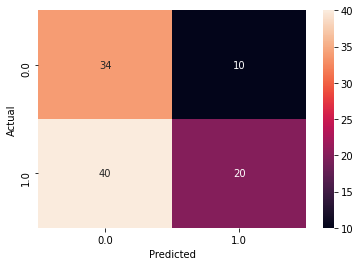

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
cv = KFold(n_splits=10)
scores = cross_val_score(neigh, df_liv_X.values, y_liv, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.14285714 0.34285714 0.62857143 0.4        0.45714286 0.41176471
 0.52941176 0.58823529 0.64705882 0.44117647]


In [ ]:
scores = cross_val_score(gnb, df_liv_X.values, y_liv, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.22857143 0.31428571 0.68571429 0.4        0.45714286 0.41176471
 0.38235294 0.55882353 0.55882353 0.5       ]


# Lungs Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_lung_X.values, y_lung, test_size=0.3, random_state=42)

In [ ]:
c1 = KNN(k=7)
c1.fit(X_train, y_train)
pred_y = c1.predict(X_test)

[3. 0. 0. 2. 0.]
[2. 2. 2. 3. 0.]
[3. 0. 0. 2. 2.]
[2. 3. 3. 3. 2.]
[0. 3. 2. 0. 0.]
[2. 2. 2. 3. 2.]
[3. 3. 2. 2. 0.]
[3. 2. 0. 3. 0.]
[2. 2. 2. 0. 0.]
[0. 2. 3. 2. 0.]


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(pred_y,y_test))
print("Accuracy ", c1.accuracy_metric(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy  100.0


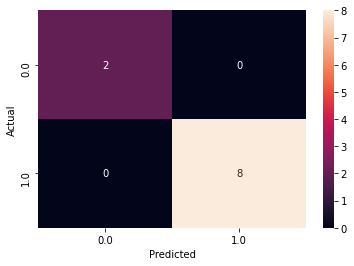

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': pred_y
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



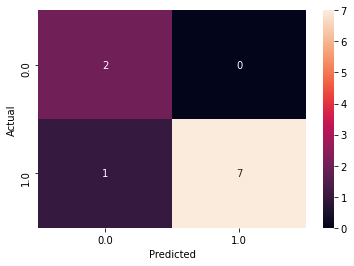

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
cv = KFold(n_splits=10)
scores = cross_val_score(neigh, df_lung_X.values, y_lung, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[1.         1.         1.         1.         0.66666667 0.66666667
 1.         1.         0.33333333 1.        ]


In [ ]:
scores = cross_val_score(gnb, df_lung_X.values, y_lung, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[1.         1.         1.         1.         0.66666667 0.66666667
 1.         1.         0.         0.66666667]


# Hepatitis Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_hepati_X.values, y_hepati, test_size=0.3, random_state=42)

In [ ]:
c1 = KNN(k=7)
c1.fit(X_train, y_train)
pred_y = c1.predict(X_test)

[3. 1. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 1. 1.]
[3. 2. 0. 3. 3. 0. 3. 0. 0. 0. 3. 0. 0. 0. 0.]
[0. 3. 0. 0. 3. 0. 3. 3. 3. 3. 3. 3. 0. 0. 1.]
[3. 2. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 0. 0. 2.]
[0. 3. 0. 0. 3. 0. 3. 3. 3. 0. 3. 3. 0. 0. 1.]
[3. 1. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 2.]
[3. 2. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0.]
[0. 3. 0. 0. 3. 0. 0. 3. 3. 3. 3. 3. 0. 3. 0.]
[3. 2. 3. 0. 3. 0. 3. 3. 0. 0. 3. 0. 0. 0. 1.]
[3. 1. 0. 3. 3. 0. 3. 3. 3. 3. 3. 3. 0. 0. 1.]
[3. 1. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 2.]
[0. 2. 0. 3. 3. 0. 3. 0. 3. 0. 0. 0. 0. 0. 0.]
[3. 1. 0. 0. 3. 0. 3. 0. 3. 0. 3. 3. 0. 0. 2.]
[3. 1. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 0. 0. 1.]
[3. 1. 0. 0. 3. 0. 0. 3. 3. 3. 0. 3. 0. 0. 0.]
[3. 1. 0. 0. 0. 3. 3. 0. 3. 3. 3. 3. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 3. 0. 3. 3. 3. 3. 1. 0. 1.]
[3. 2. 3. 0. 3. 0. 3. 0. 0. 0. 3. 3. 0. 0. 1.]
[3. 2. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 1.]
[3. 1. 0. 3. 3. 3. 3. 0. 3. 0. 3. 0. 0. 0. 1.]
[3. 1. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 1.]
[3. 1. 0. 3. 

##### Accuracy KNN *Hepatitis*

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(pred_y,y_test))
print("Accuracy ", c1.accuracy_metric(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74        29
         1.0       0.58      0.61      0.59        18

    accuracy                           0.68        47
   macro avg       0.66      0.67      0.67        47
weighted avg       0.68      0.68      0.68        47

Accuracy  68.08510638297872


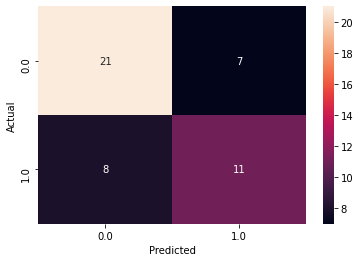

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': pred_y
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

##### Accuracy Naive Bayes Hepatitis

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74        29
         1.0       0.58      0.61      0.59        18

    accuracy                           0.68        47
   macro avg       0.66      0.67      0.67        47
weighted avg       0.68      0.68      0.68        47



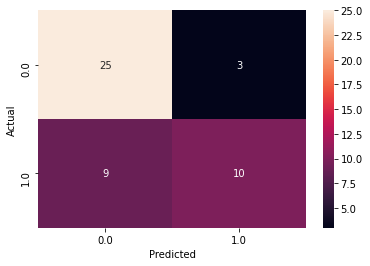

In [ ]:

data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
cv = KFold(n_splits=10)
scores = cross_val_score(neigh, df_hepati_X.values, y_hepati, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.875      0.5625     0.9375     0.75       0.75       0.66666667
 0.4        0.26666667 0.4        0.66666667]


In [ ]:
scores = cross_val_score(gnb, df_hepati_X.values, y_hepati, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.875      0.75       0.8125     0.9375     0.8125     0.73333333
 0.6        0.26666667 0.66666667 0.66666667]


     |████████████████████████████████| 102kB 5.8MB/s 
